In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Create Corpus (Tạo từ điển)**

In [ ]:
def preprocess(text):
    text = text.lower()
    words = text.split()
    return words

def create_corpus(docs):
    processed_docs = [preprocess(doc) for doc in docs]
    vocabulary = sorted(set(word for doc in processed_docs for word in doc))
    return processed_docs, vocabulary

# **2. Term Frequency (TF)**

In [ ]:
def compute_tf(word_list, vocabulary):
    word_count = {}
    for word in word_list:
        word_count[word] = word_count.get(word, 0) + 1
    tf_vector = np.array([word_count[word] / len(word_list) if word in word_count else 0 for word in vocabulary])
    return tf_vector

# **3. Inverse Document Frequency (IDF)**

In [ ]:
def compute_idf(docs, vocabulary):
    num_docs = len(docs)
    idf_vector = np.array([
        np.log((num_docs + 1) / sum(1 for doc in docs if word in doc) + 1) + 1
        for word in vocabulary
    ])
    return idf_vector

# **4. Tính TF-IDF (Mức độ quan trọng của từ)**

In [ ]:
def compute_tf_idf(docs):
    # 1. Tạo corpus
    processed_docs, vocabulary = create_corpus(docs)

    # 2. Tính TF và IDF
    tf_matrix = np.array([compute_tf(doc, vocabulary) for doc in processed_docs])
    idf_vector = compute_idf(processed_docs, vocabulary)

    # 3. Tính TF-IDF
    tf_idf_matrix = tf_matrix * idf_vector
    return tf_idf_matrix

# **5. Hàm tính độ tương đồng Cosine**

In [ ]:
def cosine_similarity(vec1, vec2):
    # Tính tích vô hướng của vec1 và vec2
    dot_product = np.dot(vec1, vec2)
    # Tính độ dài vec1 và vec2
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    # Tính độ tương đồng cosine
    cosine_similarity_score = dot_product / (norm1 * norm2) if norm1 * norm2 != 0 else 0
    return cosine_similarity_score

# **6. Ứng dụng Correlation trong việc check đạo văn**

In [ ]:
def check_plagiarism_all(docs):
    tf_idf_matrix = compute_tf_idf(docs)
    num_docs = len(docs)

    similarity_matrix = np.zeros((num_docs, num_docs))

    for i in range(num_docs):
        for j in range(num_docs):
            similarity_matrix[i, j] = cosine_similarity(tf_idf_matrix[i], tf_idf_matrix[j])

    return similarity_matrix

# **Test**

In [ ]:
docs = [
  "Học máy là một nhánh của trí tuệ nhân tạo",
  "Trí tuệ nhân tạo bao gồm học máy và mạng nơ ron",
  "Mạng nơ ron là một mô hình quan trọng trong học sâu",
  "Học sâu là một lĩnh vực của trí tuệ nhân tạo và học máy"
]

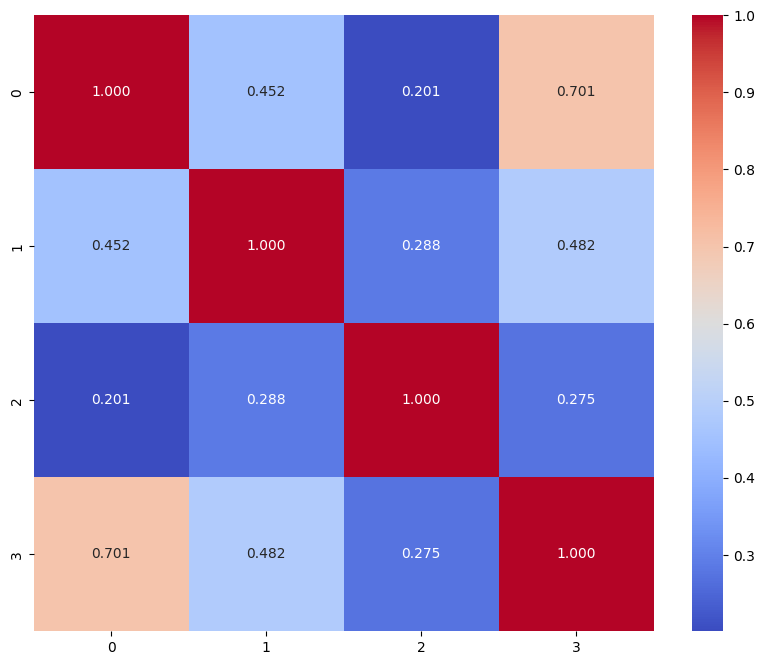

In [ ]:
similarity_matrix = check_plagiarism_all(docs)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.show()